#   A notebook that analyzes my Spotify Library of saved tracks

In [1]:
import pandas as pd
import numpy as np

### Importing user library tracks and features

In [131]:

df = pd.read_csv('my_spotify_data.csv',index_col='track_ids')
df.head()
df['duration_secs'] = df['duration_ms']/1000
df['danergy'] = (df['energy']+df['danceability'])/2

### Data Understanding 

Since my music taste is heavily composed of songs in Indian Languages, or comprising of Indian Instruments, a lot of the features that Spotify is learning and storing about these songs, could be inaccurate or suboptimal. 

*Genres*

Some of my top favorite songs - from like Remember Shakti - are part of Spotify's "Unknown" genre. Since these form a major part of my taste , I have chosen to not exclude them from my analysis.

In [132]:
df[df['top_genre']=='unknown']

,genres,track_names,album_names,artist_names,top_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,duration_secs,danergy
track_ids,,,,,,,,,,,,,,,,,,,,
7jvk8xmmSANi6qpKoLXtQG,[],Tere Liye,Mard Ko Dard Nahi Hota,Karan Kulkarni,unknown,0.695,0.3510,7,-9.920,0,0.0406,0.265,0.000002,0.1110,0.1130,124.001,4,229408,229.408,0.5230
2Roz8IjTxrseaCLprFb7IU,[],Karoon Na Yaad,Shahkar Ghazals - Ahmed Faraz Vol -2,Various Artists,unknown,0.330,0.2860,10,-17.145,0,0.0406,0.880,0.004320,0.0703,0.3350,145.068,4,396413,396.413,0.3080
7BCaSuwzYyaXuO8cyEUaiT,[],Hayo Rabba,Thappad,Anurag Saikia,unknown,0.259,0.5140,8,-6.519,1,0.0350,0.802,0.000718,0.1370,0.1590,96.297,5,302962,302.962,0.3865
1MBUN0qRBj4D9i82y1GsNk,[],Makhmali Ye Badan - Road / Soundtrack Version,Road,Various Artists,unknown,0.765,0.3960,7,-10.521,0,0.2710,0.357,0.000011,0.2290,0.3390,146.955,4,288667,288.667,0.5805
32R7r1j2r13XwF62fT8sNt,[],Manasellam Mazhaiye,Saguni,Various Artists,unknown,0.629,0.6870,10,-4.624,0,0.0393,0.592,0.000048,0.1060,0.7620,170.006,4,326495,326.495,0.6580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1YbcdMjRCGHJIWBgVTIeIT,[],Chandrakauns - Live / Instrumental,Remember Shakti,Various Artists,unknown,0.476,0.3510,0,-19.831,1,0.0672,0.916,0.867000,0.6890,0.1190,112.759,4,2016867,2016.867,0.4135
4aHJpZ6AMXOQAEMNWBUYfw,[],The Wish - Live / Instrumental,Remember Shakti,Various Artists,unknown,0.432,0.5620,0,-14.042,1,0.1380,0.776,0.830000,0.6790,0.1320,160.854,3,1128000,1128.000,0.4970
4cAZTObjvJoMGafY6C5XWn,[],Lotus Feet - Live / Instrumental,Remember Shakti,Various Artists,unknown,0.583,0.2770,0,-15.876,1,0.0379,0.925,0.915000,0.6860,0.1550,110.073,3,441067,441.067,0.4300


*Speechiness*

Some of the _rap_ music that is part of Gully boy is considered not sufficiently "Speechy" for it to garner a Speechiness quotient of over 33%. Hence, throughout my analysis, I am not going to be placing much weight on this feature

In [133]:
(df[df['track_names']=='Kaam Bhaari' ])#['album_names'])

,genres,track_names,album_names,artist_names,top_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,duration_secs,danergy
track_ids,,,,,,,,,,,,,,,,,,,,
2haaEnrn5HwCT46ZptCITK,[],Kaam Bhaari,Gully Boy,Various Artists,unknown,0.834,0.819,7,-8.502,0,0.0843,0.576,0.00326,0.0506,0.904,130.009,4,138223,138.223,0.8265


In [134]:
df[df['track_names']=='Satisfied']

,genres,track_names,album_names,artist_names,top_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,duration_secs,danergy
track_ids,,,,,,,,,,,,,,,,,,,,
3dP0pLbg9OfVwssDjp9aT0,['show tunes'],Satisfied,Hamilton (Original Broadway Cast Recording),Lin-Manuel Miranda,show tunes,0.707,0.593,5,-8.581,0,0.0949,0.287,0.0,0.15,0.478,123.772,4,329228,329.228,0.65


*Time Signature*

While I criticize some of the metrics, some others are exceptional. Some <b>live</b> tracks with recordings have perfectly coded time signatures. 
E.g. Ek Taal, which is essential 3/4 (with a 12 beat cycle) has been correctly coded here. 
E.g. Ma No Pa - a pretty recording of the Shakti classic in Abhogi is perfectly coded as well; though the genre being classified as "british jazz". C'mon Spotify - the name itself screams Indian Classical -  "Ma" no "Pa" 

In [135]:
df[df['track_names']=='Ek Taal - Live']

,genres,track_names,album_names,artist_names,top_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,duration_secs,danergy
track_ids,,,,,,,,,,,,,,,,,,,,
35PvsD9O8xNwNyhdmz3rzq,"['hindustani classical', 'hindustani instrumen...",Ek Taal - Live,Rough Guide to Zakir Hussain,Zakir Hussain,hindustani classical,0.391,0.813,9,-13.916,1,0.0964,0.508,0.692,0.303,0.721,161.661,3,452133,452.133,0.602


In [136]:
df[df['track_names']=='Ma No Pa']

,genres,track_names,album_names,artist_names,top_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,duration_secs,danergy
track_ids,,,,,,,,,,,,,,,,,,,,
6b0KegECmbGRMAV2hoAS7p,"['british jazz', 'contemporary post-bop', 'jaz...",Ma No Pa,Remember Shakti The Believer,John McLaughlin,british jazz,0.617,0.62,11,-13.983,0,0.0828,0.83,0.859,0.699,0.853,80.781,5,896347,896.347,0.6185


In [137]:
df[df['track_names']=='Saaramaina Matalu - Behag - Rupakam - Live']

,genres,track_names,album_names,artist_names,top_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,duration_secs,danergy
track_ids,,,,,,,,,,,,,,,,,,,,
4ZDQ44SvFTnh2KQqblURTP,"['carnatic', 'carnatic vocal', 'indian classic...",Saaramaina Matalu - Behag - Rupakam - Live,Gems of Carnatic Music: Abhishek Raghuram (Liv...,Abhishek Raghuram,carnatic,0.436,0.686,1,-5.406,1,0.0544,0.88,0.0,0.204,0.615,113.433,3,506520,506.52,0.561


*Liveness*

According to Spotify's definition of this feature, only a value above 0.8 warrants a strong likelihood of the track having been performed live. However, some tracks shown above, like "Ek Taal - <b>Live</b>" and "Ma No Pa" are most certainly recordings of live performances. Hence, for my personal collection, like Speechiness, I am not going to be placing much weight on this feature

*Instrumentalness*

This feature is consistently effective in identifying tracks that are primarily instrumental and are not embedded with lyrics. 

In [138]:
df[df['track_names']=='Lingus']

,genres,track_names,album_names,artist_names,top_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,duration_secs,danergy
track_ids,,,,,,,,,,,,,,,,,,,,
68d6ZfyMUYURol2y15Ta2Y,"['contemporary jazz', 'funk rock', 'jazz fusio...",Lingus,We Like It Here,Snarky Puppy,contemporary jazz,0.457,0.776,9,-10.238,0,0.142,0.147,0.676,0.689,0.476,129.896,5,645720,645.720,0.6165
5P6vo51dtkBYWXswH1twvK,"['contemporary jazz', 'funk rock', 'jazz fusio...",Lingus,We Like It Here,Snarky Puppy,contemporary jazz,0.461,0.773,9,-10.316,0,0.147,0.174,0.702,0.692,0.488,130.109,5,645894,645.894,0.6170


In [139]:
df[df['track_names']=='Isis']

,genres,track_names,album_names,artist_names,top_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,duration_secs,danergy
track_ids,,,,,,,,,,,,,,,,,,,,
6ocalrhsSidezZoM62dZjj,"['indian fusion', 'indian jazz', 'jazz fusion']",Isis,A HANDFUL OF BEAUTY (with John McLaughlin),Shakti,indian fusion,0.561,0.817,0,-8.637,1,0.109,0.213,0.529,0.243,0.452,101.381,4,913627,913.627,0.689


In [140]:
df[df['track_names']=='Zingaat']

,genres,track_names,album_names,artist_names,top_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,duration_secs,danergy
track_ids,,,,,,,,,,,,,,,,,,,,
3Kve7uioMmYxuWGRWDpXuP,[],Zingaat,Sairat (Original Motion Picture Soundtrack),Various Artists,unknown,0.775,0.852,9,-9.193,1,0.0851,0.459,0.276,0.141,0.697,129.986,4,226560,226.56,0.8135


*Danceability*

This metric is defined as a function of rhythm, tempo, beat strength and regularity; though this works very well in measuring rhythm comprehensibility and grooviness, it leaves some out amazing dance numbers in 3/4 which is not uncommon in Bollywood. E.g. Zingaat (shown above) and Chikni Chameli 

## Basic Data Analysis

In [159]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

import seaborn as sns

In [146]:
standardized_attr = ['danergy','speechiness','acousticness','instrumentalness','liveness','valence']
musical_attr = ['key','loudness','mode','tempo','time_signature','duration_secs']

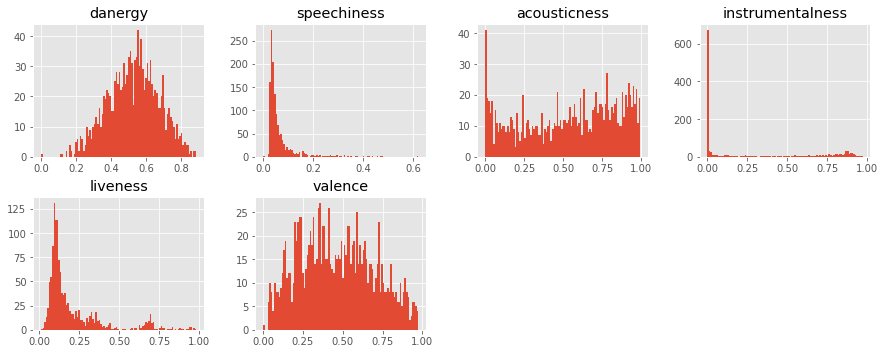

In [147]:
df[standardized_attr].hist(bins=100, figsize=(15,12),layout=(4,4));

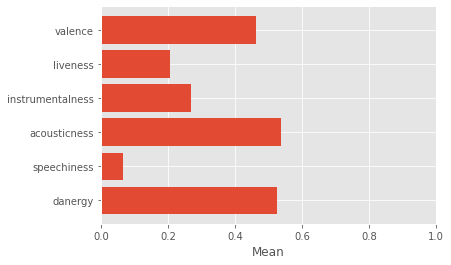

In [148]:
ind = np.arange(len(standardized_attr))

p1 = plt.barh(standardized_attr, df[standardized_attr].mean());
plt.xlabel('Mean');
plt.xlim(0,1);
style.use('ggplot')

### Discussion on the distributions and means of standardized features: 

<b>Valence</b>: Given that I am notorious for liking songs / music that lean towards "sad, depressing", a mean value lesser than 0.5 is not surprising. Why is it not far lesser than 0.5? My "Liked Songs" is not a huge reflection of my Bollywood tastes, rather contains a lot of jazz influence, hence, the average is skewed upwards here

<b>Instrumentalness</b>: Despite the fact a large number of my tracks fall under the "0" instrumentalness region of the distribution; my overall average for instrumentalness is at a solid 30%. This, in my opinion, is accurately reflective of my taste & liked songs on Spotify. I do prefer songs with minimal vocals, thus enjoy snarky puppy, vulfpeck and shakti

<b>Acousticness</b>: The acousticness is a reflection the presence of acoustic sounds / instruments in a track - like having a tabla and harmonium track. This mean value of above 50% is well-reflective. Also, on an average in spotify most content is non-acoustic (as shown by Spotify's chart below). The frequency distribution for acousticness for my library poses a stark contrast to this. 


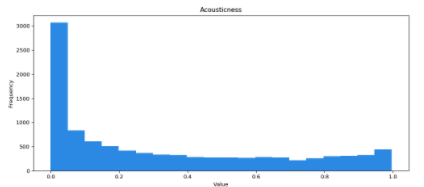

<b>Energy and Danceability</b>: Though energy and danceability sound similar, on spotify's measurement mechanism, they are quite different. While danceability is a function of rhythm, tempo, beat strength and regularity, energy is a function of loudness, timbre, dynamic range and entropy. While I can agree with the energy ratings that are provided by spotify, I don't see an easy way to correlate that with my taste and likes. So for now, I am going to not consider Energy. 
However, danceability is a great metric that measures the grooviness and rhythm comprehensibility; it also works such that the odd time signatures don't get as good a danceability score as standard 4/4 gets. This however works against some songs like Chikni Chameli or Zingaat which should have a very high Danceability score; but since they are in 3/4 they are not well understood as Danceable by Spotify's algorithm. 
Hence, I have taken an average of Danceability and Energy and created a separate metric - <b>Danergy</b>




In [225]:
filtered_std_attr = ['danergy','acousticness','instrumentalness','valence']
stats = df[filtered_std_attr].mean().tolist()

In [172]:
angles = np.linspace(0,2*np.pi,len(filtered_std_attr),endpoint=False)

#close the list 
stats = np.concatenate((stats,[stats[0]]))
angles = np.concatenate((angles,[angles[0]]))

In [173]:
stats

array([0.52641667, 0.53752317, 0.26798729, 0.46228323, 0.52641667])

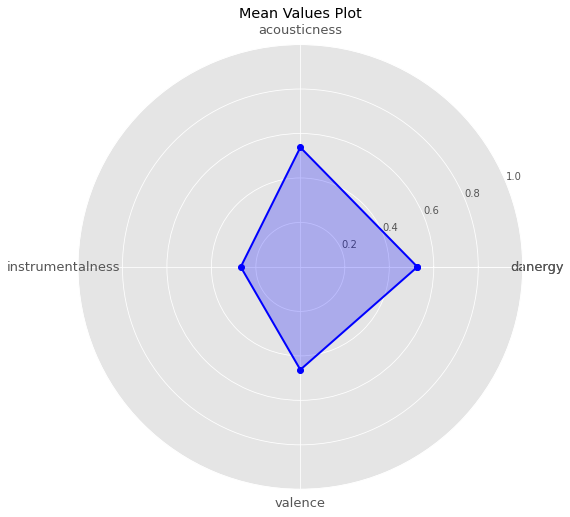

In [185]:
fig = plt.figure(figsize= (18,18))
ax = fig.add_subplot(221,polar=True)
ax.plot(angles, stats, 'o-',linewidth=2,label='Sai Mean Values', color='blue')
ax.fill(angles,stats, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, ['danergy','acousticness','instrumentalness','valence','danergy'], fontsize=13);
ax.set_title('Mean Values Plot')
plt.ylim(0,1);

## Musical Attributes

<b>Key & Mode </b>

Lets check out some sample tracks see, if the key identification is apt. 

So out of the seven tracks that I have chosen below, Spotify got the key right for exactly only 3 tracks. I can understand some of the tracks like Lingus might be difficult to identify the key for, given there are long solos which don't necessarily stay on the same key. But "Satisfied" is fairly vanilla musically, so I am a little disappointed with Spotify's performance here. 

Its quite impossible to get the mode right, after getting the key wrong; so as expected Satisfied, Lingus are classified as "Minor". 
However, when it comes to Zingaat, the algorithm has got both the key and the mode right. 

Key and Mode would be exceptional features to use for prediction - in my experience, I have noticed, people have strong draws toward certain major or minor scales. Also, lots of people might subconciously value "sing along-ability" to be an important criteria in their music tastes - so Key is a very important factor in that regard. 
However, given the lack of accuracy and the unreliability in this feature, I am going to ignore these features 



<b>Tempo </b>

The tempo identified by spotify seems fairly, roughly accurate. I only wish that for tracks that don't have any time signature (completely ad-lib free of time tracks), Spotify would return <b>-1</b> 

<b>Time Signature </b>
So in my entire collection I might have about 10-15 tracks that are 7/4. No time signatures above 5 even show up in the output. 
There is an awful lot of songs that are classified as time-signature being 1. No idea what that means 




<b>Duration & Loudness </b>

I am going to hope these metrics don't need any verification and are pretty accurate 



In [197]:
df[df['track_names']=='Satisfied'][['track_names', 'album_names','key','mode','loudness','tempo','time_signature']]

,track_names,album_names,key,mode,loudness,tempo,time_signature
track_ids,,,,,,,
3dP0pLbg9OfVwssDjp9aT0,Satisfied,Hamilton (Original Broadway Cast Recording),5,0,-8.581,123.772,4


In [199]:
df[df['track_names']=='Lingus'][['track_names', 'album_names','key','mode','loudness','tempo','time_signature']]

,track_names,album_names,key,mode,loudness,tempo,time_signature
track_ids,,,,,,,
68d6ZfyMUYURol2y15Ta2Y,Lingus,We Like It Here,9,0,-10.238,129.896,5
5P6vo51dtkBYWXswH1twvK,Lingus,We Like It Here,9,0,-10.316,130.109,5


In [200]:
df[df['track_names']=='Zingaat'][['track_names', 'album_names','key','mode','loudness','tempo','time_signature']]

,track_names,album_names,key,mode,loudness,tempo,time_signature
track_ids,,,,,,,
3Kve7uioMmYxuWGRWDpXuP,Zingaat,Sairat (Original Motion Picture Soundtrack),9,1,-9.193,129.986,4


In [198]:
df[df['track_names']=='Lotus Feet'][['track_names', 'album_names','key','mode','loudness','tempo','time_signature']]

,track_names,album_names,key,mode,loudness,tempo,time_signature
track_ids,,,,,,,
6Vr9LYc5YgjOccDXfYqp4l,Lotus Feet,Remember Shakti The Believer,4,0,-21.573,108.407,3
2VBOugLKz1DiybKvtaSWE8,Lotus Feet,Shakti with John McLaughlin (with John McLaugh...,2,0,-27.570,94.892,4


In [201]:
df[df['track_names']=='Ma No Pa'][['track_names', 'album_names','key','mode','loudness','tempo','time_signature']]

,track_names,album_names,key,mode,loudness,tempo,time_signature
track_ids,,,,,,,
6b0KegECmbGRMAV2hoAS7p,Ma No Pa,Remember Shakti The Believer,11,0,-13.983,80.781,5


In [202]:
df[df['track_names']=='Saaramaina Matalu - Behag - Rupakam - Live'][['track_names', 'album_names','key','mode','loudness','tempo','time_signature']]

,track_names,album_names,key,mode,loudness,tempo,time_signature
track_ids,,,,,,,
4ZDQ44SvFTnh2KQqblURTP,Saaramaina Matalu - Behag - Rupakam - Live,Gems of Carnatic Music: Abhishek Raghuram (Liv...,1,1,-5.406,113.433,3


####  Distributions of Musical Attributes

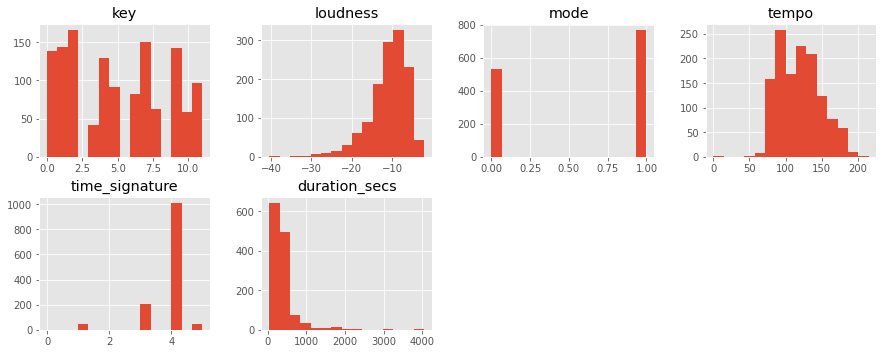

In [211]:
df[musical_attr].hist(bins=15, figsize=(15,12),layout=(4,4));

In [226]:
filtered_musical_attr = ['loudness','tempo','duration_secs']

In [227]:
all_attr = filtered_std_attr+ filtered_musical_attr 

In [231]:
df_ml = df[all_attr]

In [233]:
df_ml.to_csv('my_spotify_data_filtered.csv')